In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
from PIL import Image, ImageEnhance
import mahotas as mt
import sklearn

In [2]:
from test2 import get_descriptors, apply_mask
from morph_texture import normalize

In [3]:
R, G, B = 0, 1, 2
H, W, CH = 0, 1, 2

In [4]:
def show(img, plt_size=(16, 10), cmap=None):
    fig = plt.figure(figsize=plt_size)
    plt.imshow(img, cmap=cmap if cmap is not None else (None if len(img.shape) == 3 else 'gray'))

In [5]:
downsize_factor = 8

In [6]:
img = imageio.imread('./test_img.png')
img = cv2.resize(img, (img.shape[W] // downsize_factor, img.shape[H] // downsize_factor))

In [14]:
mean_px = np.mean(img, axis=(0,1))
reg = normalize(img - mean_px, (0, 255), np.uint8)

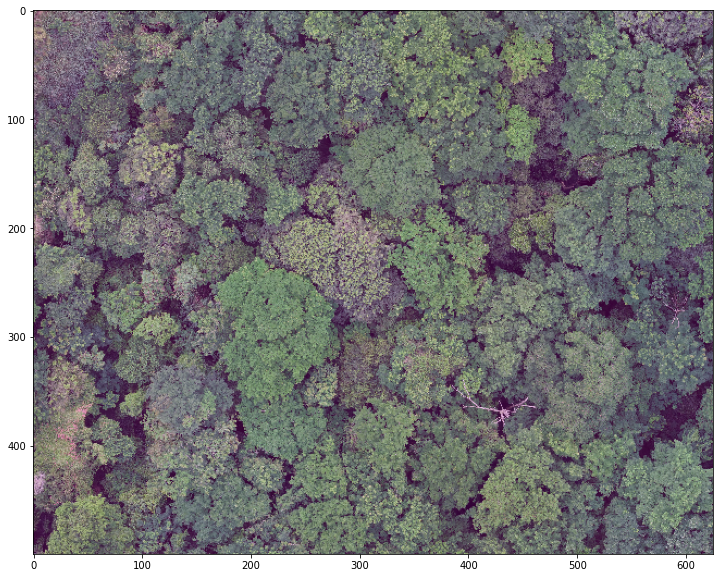

In [15]:
show(reg)

In [83]:
reg.dtype

dtype('uint8')

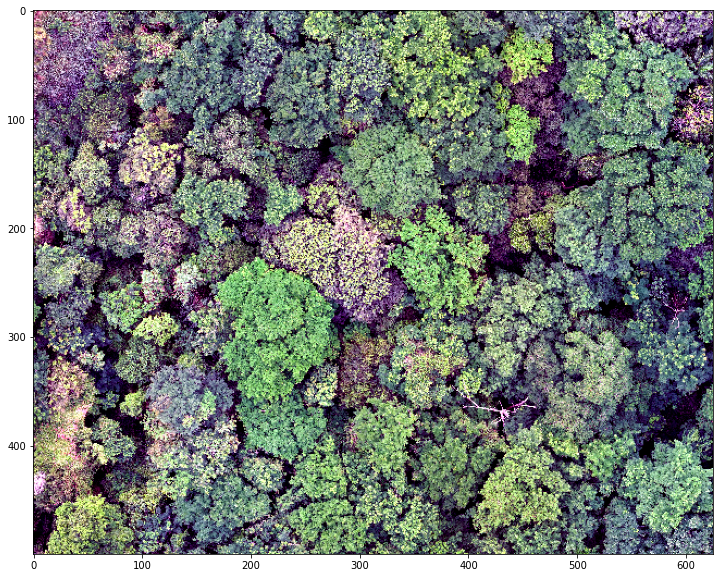

In [16]:
enh = ImageEnhance.Contrast(Image.fromarray(reg))
highcontrast = enh.enhance(2.5)
hc = np.asarray(highcontrast)
show(hc)

In [71]:
blurred = cv2.medianBlur(hc, 17)

In [72]:
hsv = cv2.cvtColor(blurred, cv2.COLOR_RGB2HSV)

In [73]:
hue = hsv[:, :, 0]

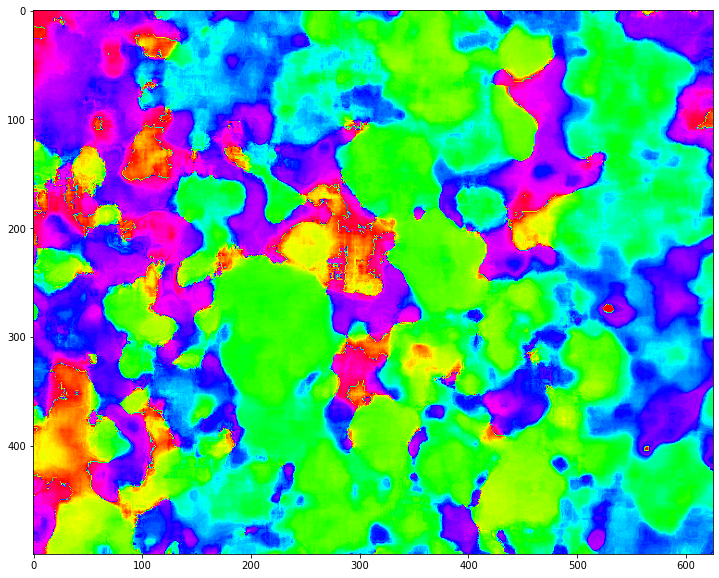

In [74]:
show(hue, cmap='hsv')

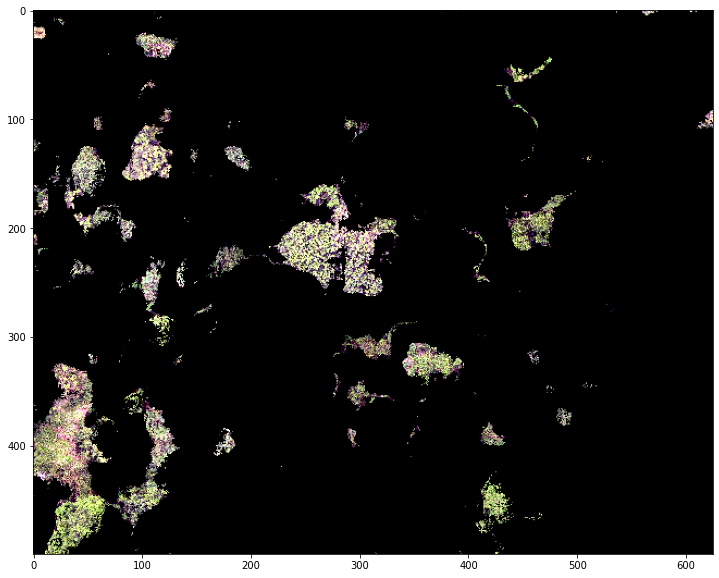

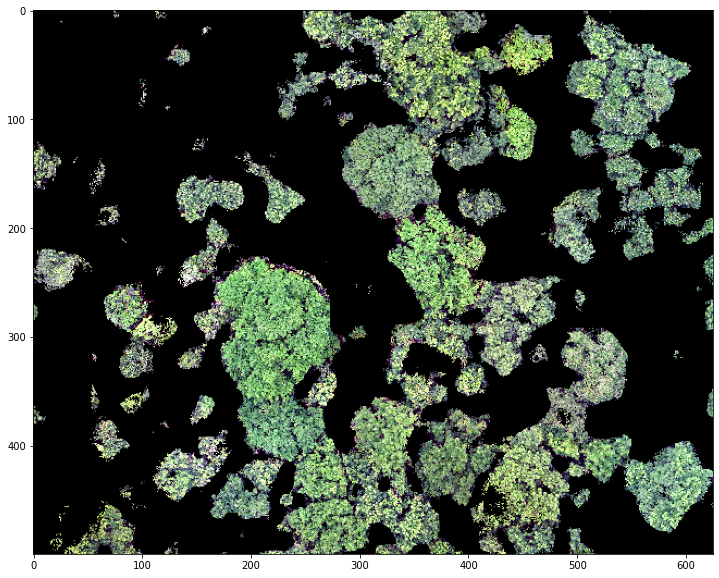

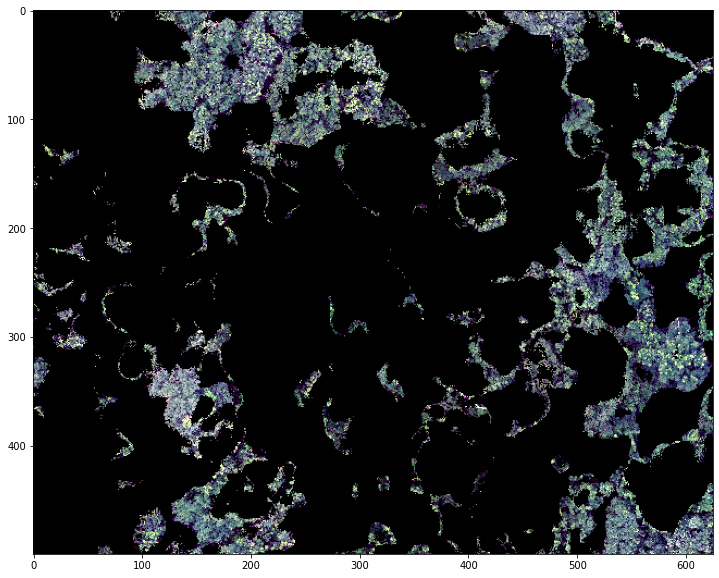

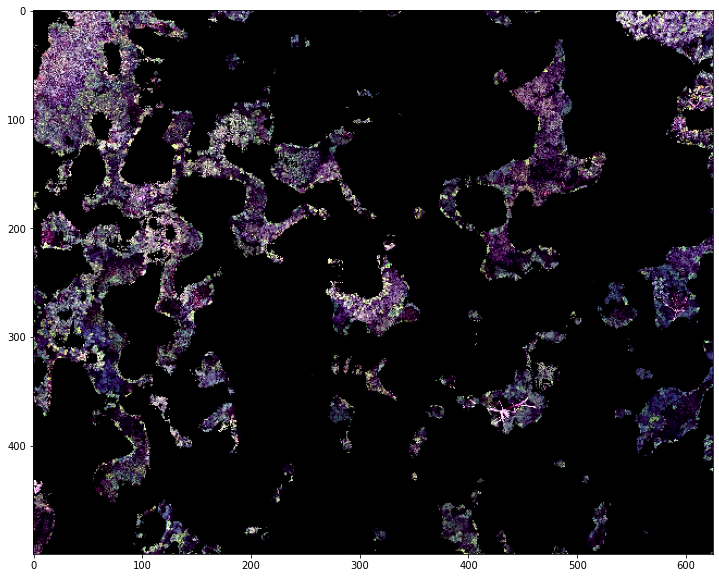

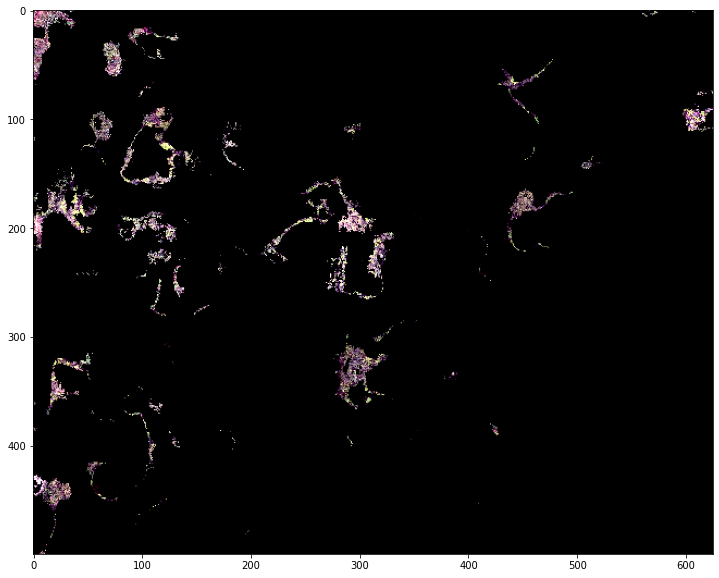

In [81]:
bin_size = 40

for i in range(np.min(hue), np.max(hue), bin_size):
    idxs = np.where((hue >= i) & (hue < i + bin_size))
    segment = np.zeros_like(img)
    segment[idxs] = hc[idxs]
    show(segment)

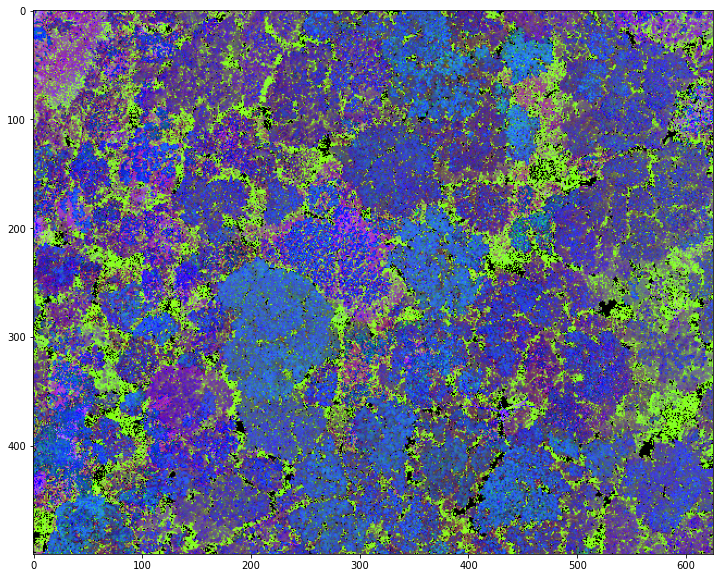

In [47]:
show(cv2.GaussianBlur(hsv, (3, 3), 0.3), cmap='hsv')